<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.

In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.

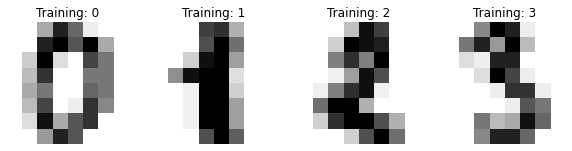

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.

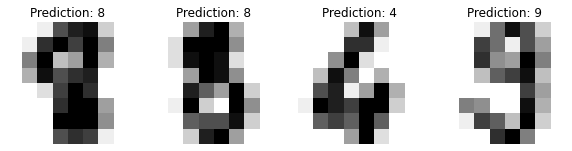

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [5]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


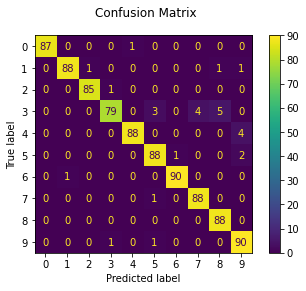

In [6]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Phân tích trước khi thực hiện
### Đặc điểm ảnh trong bộ dataset
* kích thước: 8*8 grayscale
* giá trị mỗi pixel nằm trong khoảng 0 - 15

### Đặc điểm ảnh chụp được
* Kích thước: 480*640 RBL
* giá trị mỗi pixel nằm trong khoảng 0 - 255

Sau khi chụp được hình từ webcam, thì chuyển đổi để ảnh chụp được có đặc điểm giống ảnh trong bộ dataset sau đó thực hiện predict.

#WEBCAM

In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#IMPORT THƯ VIỆN

In [8]:
import cv2 as cv
import numpy as np

#CHỤP HÌNH SỐ ĐỂ NHẬN DẠNG
* Chụp 6 hình lưu các số từ 1 đến 6 vào list images
* tạo bộ target [1,2,3,4,5,6] tương ứng với nội dung ảnh

<IPython.core.display.Javascript object>

Saved to photo.jpg


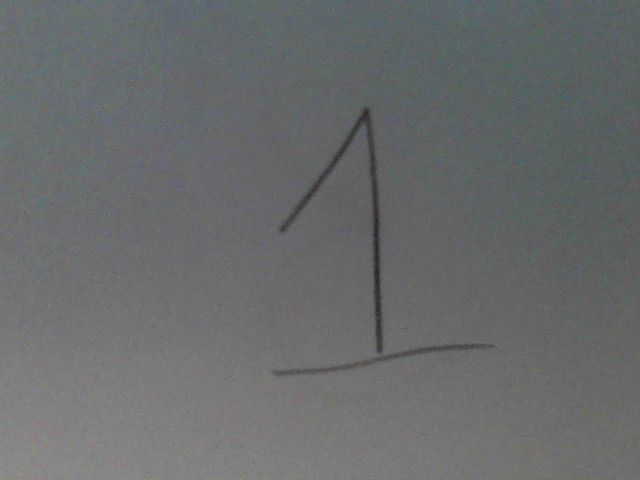

<IPython.core.display.Javascript object>

Saved to photo.jpg


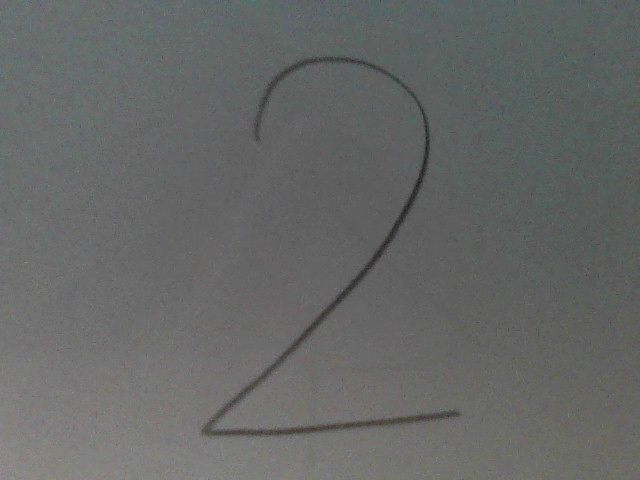

<IPython.core.display.Javascript object>

Saved to photo.jpg


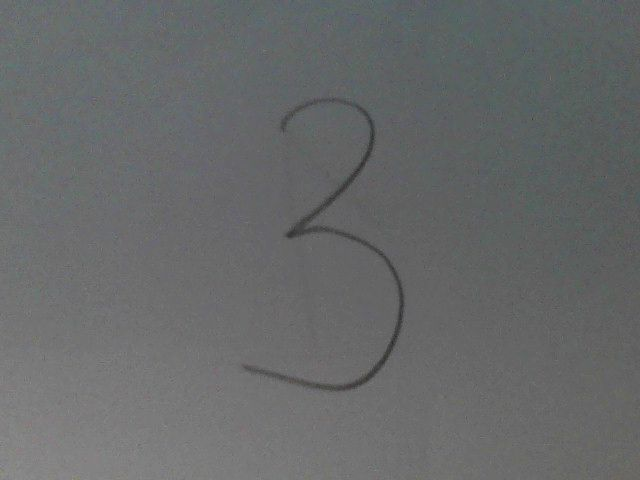

<IPython.core.display.Javascript object>

Saved to photo.jpg


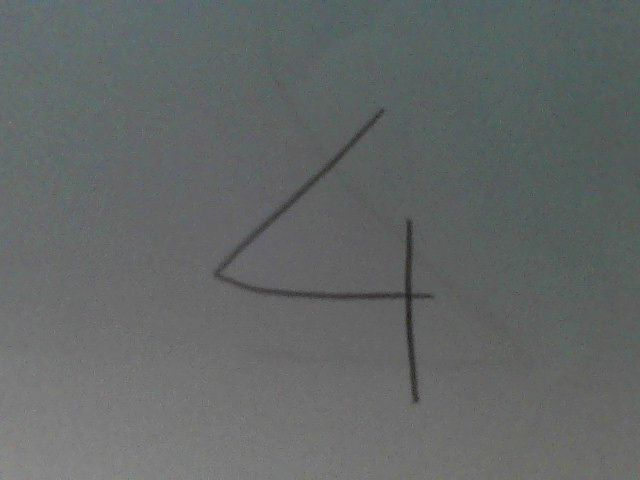

<IPython.core.display.Javascript object>

Saved to photo.jpg


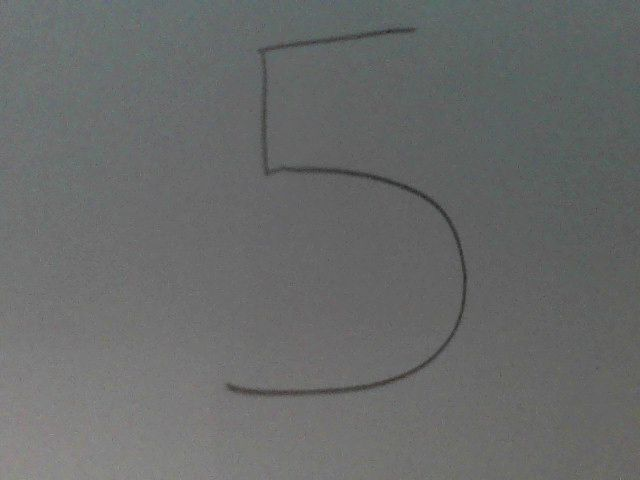

<IPython.core.display.Javascript object>

Saved to photo.jpg


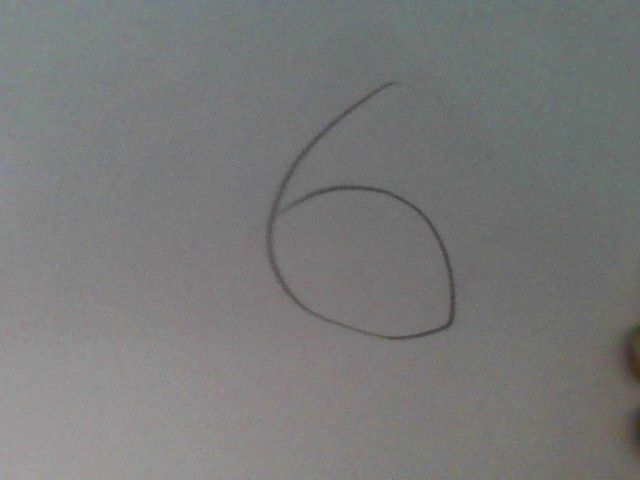

In [9]:
images = []
target = [1, 2, 3, 4, 5, 6]
from IPython.display import Image
temp = 0
while(temp < 6):
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
    print(str(err))
  # chuyển ảnh về dạng grayscale rồi lưu vào images
  image = cv.imread(filename, 0)
  images.append(image)
  temp +=1

## 6 số chụp được từ webcam laptop

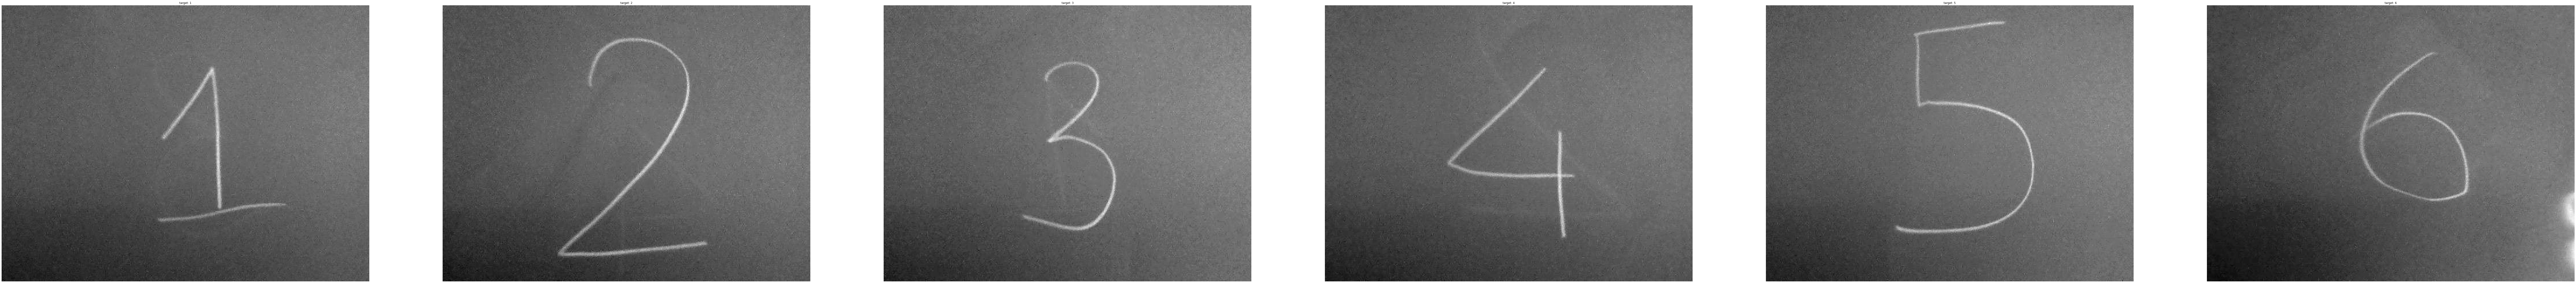

In [10]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(200, 30))
for ax, image, label in zip(axes, images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('target: %i' % label)

In [11]:
#chuyển images về ndarray để dễ sử lí
images = np.array(images)

In [12]:
print(images.shape)

(6, 480, 640)


In [13]:
# thực hiện chuyển ảnh từ kích thước (480, 640) về kích thước (8, 8)
Images = []
for i in range(6):
  temp = cv.resize(images[i], (8, 8))
  Images.append(temp)

In [15]:
Images = np.array(Images)
print(Images.shape)

(6, 8, 8)


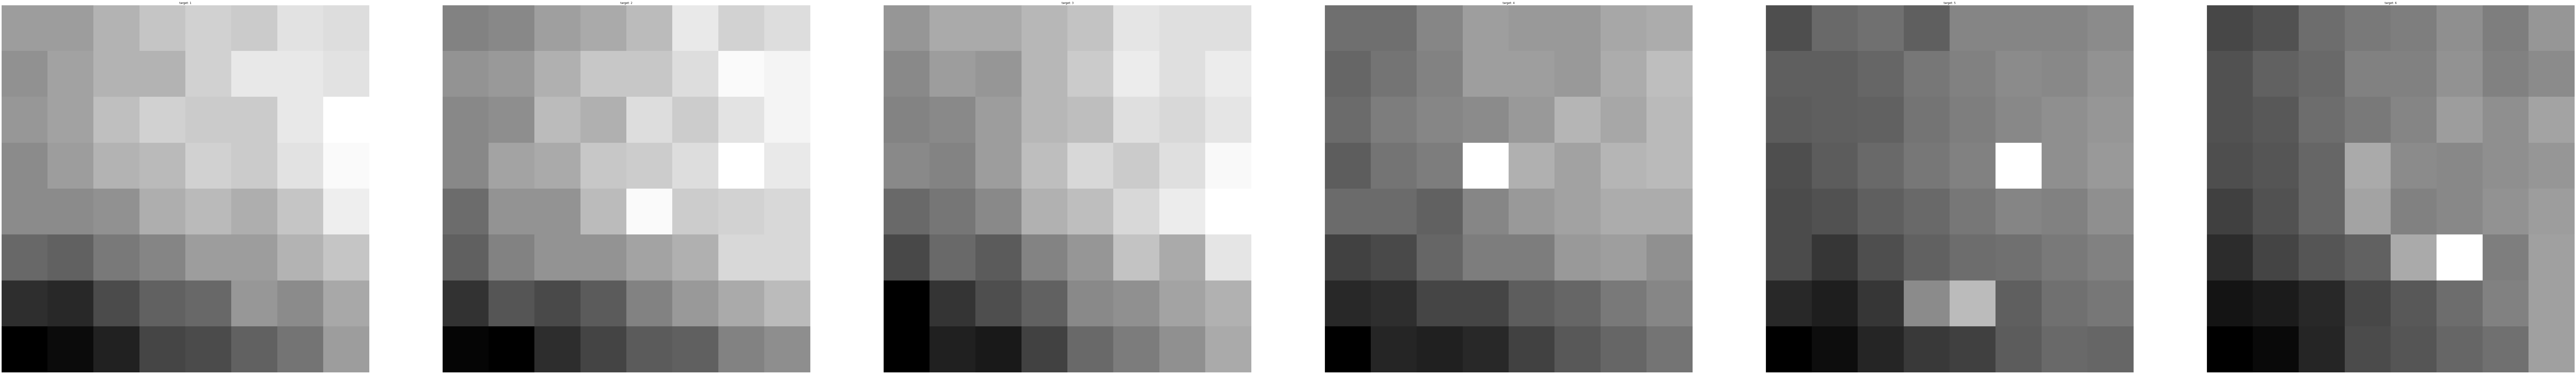

In [16]:
# xuất 6 ảnh sau khi thực hiện chuyển đổi
Images = np.array(Images)
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(200, 30))
for ax, image, label in zip(axes, Images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('target: %i' % label)

In [17]:
# đưa ảnh về (64, 1) để thực hiện predict
# đồng thời đưa giá trị mỗi pixel về trong khoảng (0, 15)
images_flat = Images.reshape(6, 64)
for i in range(len(images_flat)):
  images_flat[i] = images_flat[i]/255*15


In [18]:
#thực hiện predict
y_pred = clf.predict(images_flat)

In [19]:
print(y_pred)

[5 5 5 5 5 9]


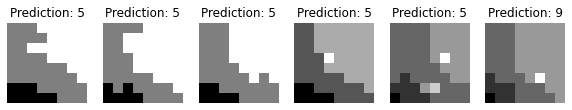

In [20]:
# 6 ảnh sau khi thực hiện predict cùng label được predict
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, images_flat, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## kết quả so sánh sau khi predict

In [21]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(target, y_pred)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.17         6
   macro avg       0.03      0.14      0.05         6
weighted avg       0.03      0.17      0.06         6




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]


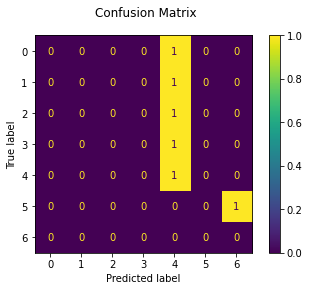

In [22]:
disp = metrics.plot_confusion_matrix(clf, images_flat, target)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# TRẢ LỜI CÂU HỎI
### Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
>kết quả không được tốt, cụ thể 6 ảnh chụp được ở trên không predict đúng ảnh nào.

### Ủa mà nhìn vào đâu để kết luận là tốt hay không?
>nhìn vào kết quả so sánh thấy được độ chính xác không tốt.

### Nếu không tốt thì lý do tại sao?
* webcam laptop chụp hình có chất lượng không tốt, điều kiện ánh sáng, môi trường không phù hợp.
* sau khi chuyển ảnh chụp được từ webcam sang ảnh có đặc điểm giống ảnh trong dataset thì đã mất đi nhiều thông tin, xử kí ảnh không tốt.
* Model bị overfit với bộ dataset.

### Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
> Không sử dụng model này vào thực tế nhận dạng biển số được. Để sử dụng model trong thực tế cần cập nhập lại bộ dataset cho phù hợp cộng với sử đụng các kĩ thuật để chuyển đổi ảnh cho phù hợp